In [ ]:
!pip install google-cloud-bigquery pandas matplotlib seaborn

In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the uploaded service account key
KEY_PATH = "/content/sylvan-byway-464104-m3-f83c3238d888.json"

# Authenticate with BigQuery
credentials = service_account.Credentials.from_service_account_file(KEY_PATH)
client = bigquery.Client(credentials=credentials, project=credentials.project_id)


          Lead_Actor  total_awards
0     Kangana Ranaut         50531
1          Tom Hanks         50359
2    Natalie Portman         50261
3        Chris Evans         49962
4          Brad Pitt         49890
5      Anne Hathaway         49657
6        Emma Watson         49653
7  Leonardo DiCaprio         49583
8     Shah Rukh Khan         49378
9   Amitabh Bachchan         48948


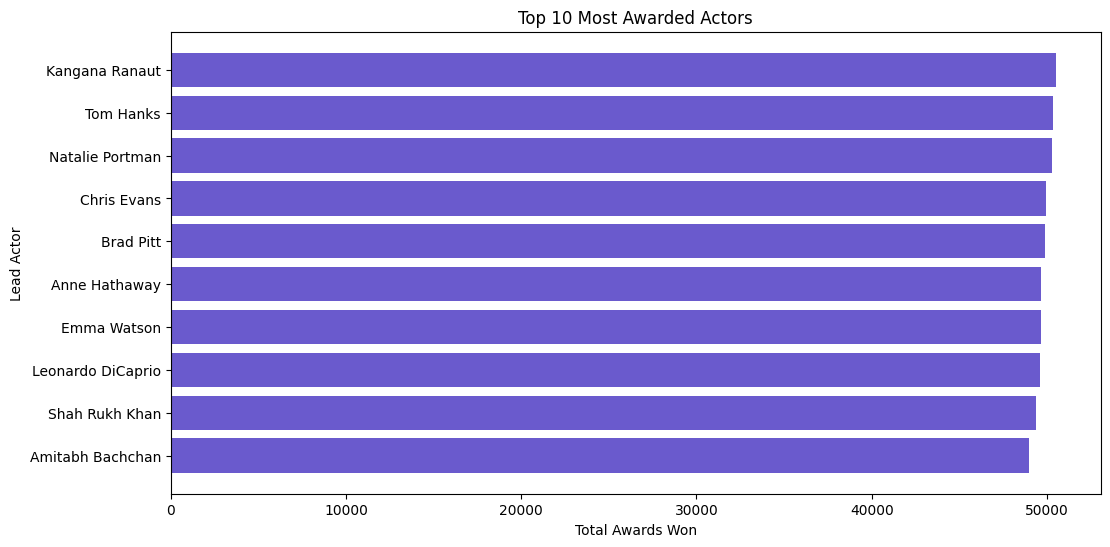

In [18]:
# Most Awarded Actor

query = """
SELECT a.Lead_Actor,
    SUM(md.Num_Awards) AS total_awards
FROM `sylvan-byway-464104-m3.miniProject.MovieData` md
INNER JOIN `sylvan-byway-464104-m3.miniProject.LeadActors` a
ON md.lead_actor_id = a.lead_actor_id
GROUP BY a.Lead_Actor
ORDER BY total_awards DESC
LIMIT 10;
"""

df = client.query(query).to_dataframe()
print(df)

plt.figure(figsize=(12, 6))
plt.barh(df['Lead_Actor'], df['total_awards'], color='slateblue')
plt.xlabel('Total Awards Won')
plt.ylabel('Lead Actor')
plt.title('Top 10 Most Awarded Actors')
plt.gca().invert_yaxis()
plt.show()


   Year  num_movies
0  1981        1196
1  2015        1185
2  2010        1185
3  2022        1179
4  2007        1172
5  1984        1168
6  2012        1167
7  2006        1165
8  1986        1165
9  1994        1160


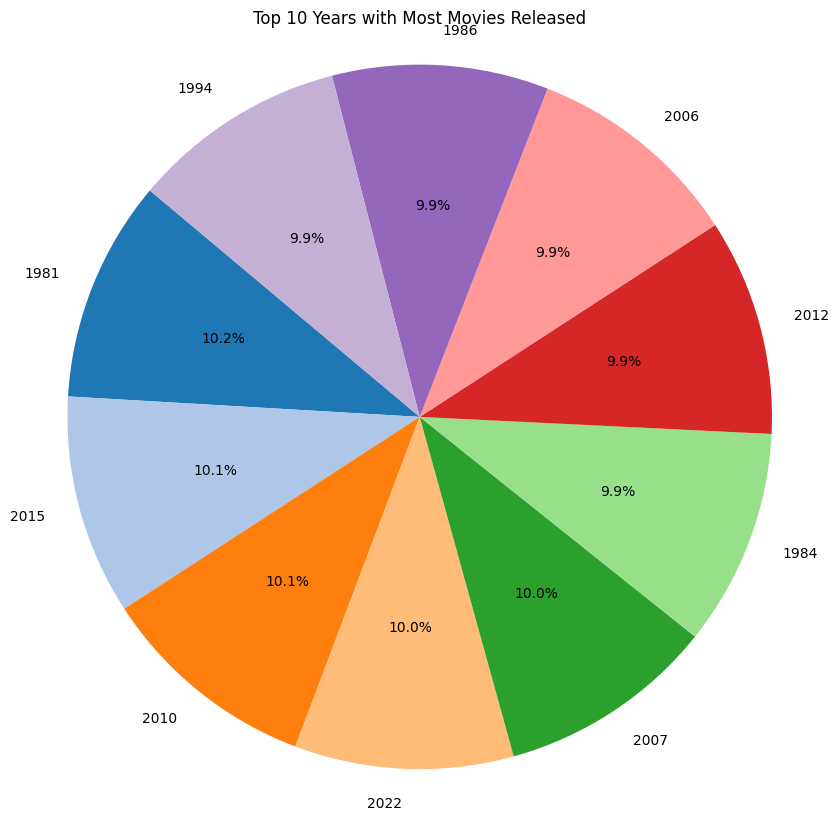

In [19]:
# Top 10 Years with Most Number of Movies Released

query = """
SELECT md.Year, COUNT(md.Title) AS num_movies
FROM `sylvan-byway-464104-m3.miniProject.MovieData` md
WHERE md.Year IS NOT NULL
GROUP BY md.Year
ORDER BY num_movies DESC
LIMIT 10;
"""

df = client.query(query).to_dataframe()
print(df)

plt.figure(figsize=(10, 10))
plt.pie(df['num_movies'], labels=df['Year'].astype(str), autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Top 10 Years with Most Movies Released')
plt.axis('equal')
plt.show()


      Genre  avg_boxoffice_usd
0     Drama       5.233699e+08
1   Fantasy       5.197420e+08
2    Horror       5.181890e+08
3    Action       5.179836e+08
4    Comedy       5.161895e+08
5   Romance       5.147482e+08
6  Thriller       5.129687e+08


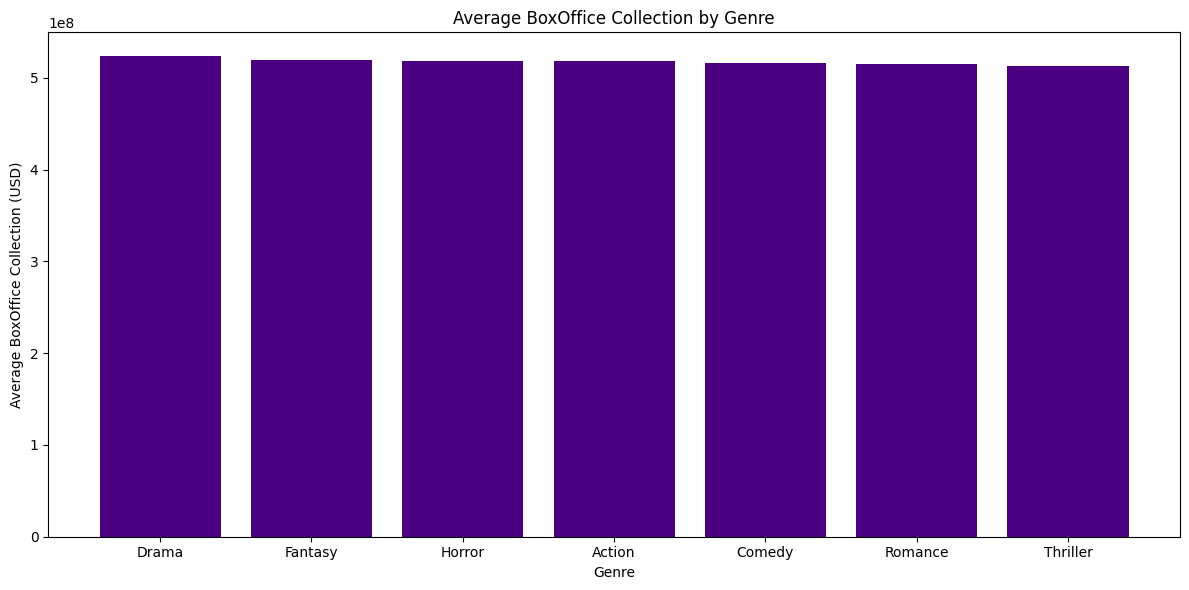

In [21]:
# Average BoxOffice Collection by Genre

query = """
SELECT g.Genre, AVG(md.BoxOffice_USD) AS avg_boxoffice_usd
FROM `sylvan-byway-464104-m3.miniProject.MovieData` md
INNER JOIN `sylvan-byway-464104-m3.miniProject.Genres` g
ON md.genre_id = g.genre_id
WHERE md.BoxOffice_USD IS NOT NULL AND md.BoxOffice_USD > 0
GROUP BY g.Genre
ORDER BY avg_boxoffice_usd DESC;
"""

df = client.query(query).to_dataframe()
print(df)

plt.figure(figsize=(12, 6))
plt.bar(df['Genre'], df['avg_boxoffice_usd'], color='indigo')
plt.xlabel('Genre')
plt.ylabel('Average BoxOffice Collection (USD)')
plt.title('Average BoxOffice Collection by Genre')
plt.tight_layout()
plt.show()


     Director  total_invested_budget
0      N. Roy           473335213779
1    J. Smith           468129784908
2    M. Brown           462537175053
3      R. Lee           460511783578
4     S. Chen           459902315456
5    D. Patel           459561897066
6    L. Zhang           454234841064
7     A. Khan           453008329803
8    P. Adams           452145928164
9  T. Johnson           446204324213


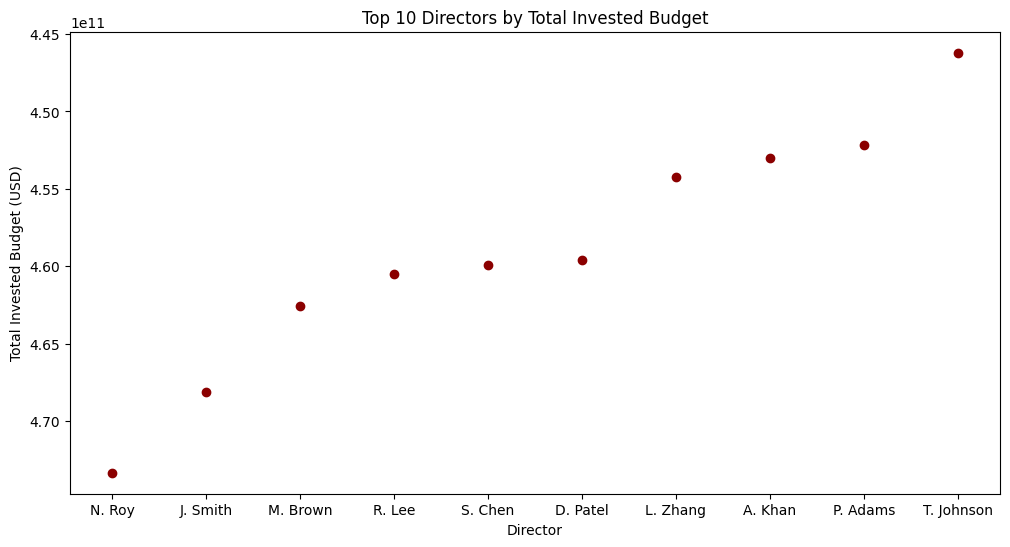

In [27]:
# Directors who invested the highest total budget

query = """
SELECT d.Director, SUM(md.Budget_USD) AS total_invested_budget
FROM `sylvan-byway-464104-m3.miniProject.MovieData` md
INNER JOIN `sylvan-byway-464104-m3.miniProject.Directors` d
ON md.director_id = d.director_id
WHERE md.Budget_USD IS NOT NULL AND md.Budget_USD > 0
GROUP BY d.Director
ORDER BY total_invested_budget DESC
LIMIT 10;
"""

df = client.query(query).to_dataframe()
print(df)

plt.figure(figsize=(12, 6))
plt.scatter(df['Director'], df['total_invested_budget'], color='darkred')
plt.xlabel('Director')
plt.ylabel('Total Invested Budget (USD)')
plt.title('Top 10 Directors by Total Invested Budget')
plt.gca().invert_yaxis()
plt.show()
